# LIBRA example

Compiled: June 15, 2021.

LIBRA can be use as an a**lernative to existing methods for paired multi-omics integration and prediction**. Outputs can be use for regular downstream analysis such us **markers identification, clusterig or visualization** among others.

For tutorial propouse we will **load a pre-trained model** from SNARE-seq: GSE126074. It contains paired profiling of **mRNA expression and chromatin accessibility** from adult Mouse brain cortex cells **already preprocessed** as expained in manuscript . 

In [1]:
options(warn=-1)

###########################
#Prepare enviroment
set.seed(1234567)
options(stringsAsFactors = FALSE)

#Commented resourcess will be required for training the model
#library("keras")
#K <- keras::backend()
#tensorflow::tf$compat$v1$disable_eager_execution()
#print("backend mounted")

#Extra resources for manage data, clustering and visualization
library("Seurat")
library("ggplot2")

print("Requirements loaded")
gc()

Attaching SeuratObject



[1] "Requirements loaded"


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2468782,131.9,4511601,241,4218204,225.3
Vcells,4180475,31.9,8388608,64,6837395,52.2


Setting the **workspace**. Loading the **output of the pre-trained model** as well as **pre-processed RNA and ATAC Seurat objects**.

In [2]:
setwd("/your_path")

load("jupyter_notebook_data.RData")
print("Loaded pre-trained model output and pre-processed RNA&ATAC Seurat objects")
ls()

[1] "Loaded pre-trained model output and pre-processed RNA&ATAC Seurat objects"


[1] "atac_preprocessed"  "libra_prediction"   "libra_shared_space"
[4] "rna_preprocessed"   "x_train2"

In [3]:
#This object represents RNA pre-processed Seurat object
rna_preprocessed

#This object represents ATAC pre-processed Seurat object
atac_preprocessed

#This object represents LIBRA shared space generated after training.
#Rows are the cells and columns are each of the LIBRA's middle layer componens obtained
dim(libra_shared_space)
libra_shared_space[1:10,1:10]

#This object represents LIBRA predicted RNA data from trained LIBRA model
dim(libra_prediction)
libra_prediction[1:10,1:10]

#x_train2 represents RNA original pre-processed data
dim(x_train2)

An object of class Seurat 
23714 features across 6735 samples within 1 assay 
Active assay: RNA (23714 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
260015 features across 6735 samples within 3 assays 
Active assay: ATAC (239019 features, 239019 variable features)
 2 other assays present: ACTIVITY, RNA
 2 dimensional reductions calculated: lsi, umap

[1] 6735   10

ACGTGGTGACTT,-3.153687,-10.7397709,-4.592525,7.9222879,-17.064606,-10.582845,-12.659788,-6.3117433,0.05263586,-0.07983817
GAGGTAACCCGA,-12.828039,-0.1067303,-8.381050,-2.6925564,-9.143703,3.509323,6.607215,1.0762094,6.36003399,-7.75068665
TGCATAGGTTCC,-20.181019,-0.5175510,-8.406287,2.4209194,-7.965171,-8.237067,2.428956,3.0647788,8.26862049,-10.13836479
TCACATTGTGTC,-11.728696,3.1770225,-7.837760,-2.6554458,-1.413068,-13.512054,-9.539433,-9.8103685,-4.80900049,5.28739548
GCGAAAGCCTGC,-8.221917,2.3842278,-13.493577,-2.0651867,2.525759,-14.321442,-9.326781,-3.1898673,-1.32292247,4.43969774
GATAATATCGCC,-3.568389,0.3848678,-3.645954,-2.2275772,1.057875,-11.665576,-13.154055,-10.9391718,-1.39789999,1.90115225
TGCCGAACAGTT,-5.511157,-6.4645281,-2.183800,-6.4862523,-1.717358,-15.172028,-13.285832,2.5626290,-1.76946330,-4.38640642
ATCTCATCCCTT,6.165296,-10.5071535,-3.729507,-4.5010619,-16.774059,-8.521131,-7.254384,-19.2144108,-4.76974058,0.58667237
AGTCCGCGATTC,6.698446,-13.1412621,-3.608356,-11.8384190,-7.294983,-16.429018,2.585669,0.3385192,-4.32201481,-7.46200180
CCCTTTAACCCC,-14.056255,1.8854587,-10.098835,0.9650277,-6.229187,-3.101975,2.832636,-8.8024969,7.82317495,-12.40029144


[1] 6735 2000

,Adarb2,Erbb4,Galntl6,Nxph1,Plp1,Tshz2,Sst,Luzp2,Reln,Sox2ot
ACGTGGTGACTT,0.19023335,0.28960514,1.5936148,0.15016592,0.03868408,0.22428352,-0.003305886,0.7054258,0.48766759,0.07220095
GAGGTAACCCGA,0.32343087,0.28216878,1.0755600,0.24318397,0.08043519,0.27916786,0.037056115,0.1747416,0.06290859,0.13060647
TGCATAGGTTCC,0.16336304,0.08851942,0.7307827,0.09043048,0.03550838,0.16020112,0.023779785,0.3661245,0.13634229,0.02975383
TCACATTGTGTC,0.19568399,0.22737637,0.2952302,0.12184480,0.14403489,0.11030693,0.004711691,0.3820651,0.16762266,0.10751291
GCGAAAGCCTGC,0.14128122,0.15668258,0.3020986,0.10008643,0.14151928,0.05812395,0.036193024,0.4716719,0.25867876,0.09144985
GATAATATCGCC,0.25005972,0.25457487,0.7304918,0.04384089,0.09856266,0.10787360,0.004939485,0.3085935,0.16639665,0.06940041
TGCCGAACAGTT,0.27934253,0.27670270,0.6657395,0.11903984,0.13261430,0.16147365,0.030834999,0.5557854,0.20158133,0.22853291
ATCTCATCCCTT,0.16949648,0.25686008,3.0561604,0.05478273,0.13848583,0.13535383,-0.002255685,0.1448556,0.11853655,0.04669791
AGTCCGCGATTC,0.07361627,0.13476264,2.1976004,0.08062322,0.17056806,0.11915486,0.033845685,0.1084230,0.09377378,0.07351444
CCCTTTAACCCC,0.37654161,0.30970168,0.8664840,0.09526060,0.07480203,0.19486165,0.013675030,0.3369787,0.06123281,0.16591844


[1] 6735 2000

In orther to **train a new LIBRA model** find attached code snippet where **x_train is ATAC pre-processed** data and **x_train2 is RNA pre-processed** data. If prediction want to be performed in the reverse order just change omics order but for integration we **recomend to use x_train2 as RNA**. **Change validation_split=0 to validation_split=0.2** base on develop or deploy outcomes proposal.

## Parameters   
batch_size <- 7000L #Base on GPU/CPU usage RAM and time desired  
original_dim <- ncol(x_train)  
latent_dim <- 10 #10L   
epochs <- 1500L #1500L  

## Model definition
model <- keras_model_sequential()  
model %>%  
  layer_dense(units = 512, input_shape = ncol(x_train)) %>%  
  layer_activation_leaky_relu() %>%  
  layer_dropout(rate = 0.2) %>%  
  layer_dense(units = 256, input_shape = ncol(x_train)) %>%  
  layer_activation_leaky_relu() %>%  
  layer_dropout(rate = 0.2) %>%  
  layer_dense(units = latent_dim, name = "bottleneck") %>%  
  layer_activation_leaky_relu() %>%  
  layer_dropout(rate = 0.2) %>%  
  layer_dense(units = 256) %>%  
  layer_activation_leaky_relu() %>%  
  layer_dropout(rate = 0.2) %>%  
  layer_dense(units = 512) %>%  
  layer_activation_leaky_relu() %>%  
  layer_dense(units = ncol(x_train2), name = "output")  
  
  
model %>% compile(  
  loss = "mean_squared_error",  
  optimizer = optimizer_adam(),  
  metrics = list("mean_squared_error")  
)  
  
## Store model  
checkpoint <- callback_model_checkpoint(  
  monitor = "loss",  
  filepath = paste0("LIBRA_model.hdf5"),  
  save_best_only = TRUE,  
  period = 1,  
  verbose = 1  
)  
  
early_stopping <- callback_early_stopping(monitor = "loss", patience = 20)  

## Model training
history_atac <- model %>% fit(  
  x = x_train,  
  y = x_train2,  
  epochs = epochs,  
  batch_size = batch_size,    
  callbacks = list(checkpoint, early_stopping),  
  validation_split = 0  
)
  
## Model outcomes: Shared space  
layer_name = 'bottleneck'  
intermediate_layer_model <- keras_model(inputs = model$input, outputs = get_layer(model, layer_name)$output)  
libra_shared_space <- predict(intermediate_layer_model, x_train)  
  
Set correct names  
rownames(libra_shared_space) = rownames(x_train)  
  
## Model outcomes: Prediction   
layer_name = 'output'  
output_layer_model <- keras_model(inputs = model$input, outputs = get_layer(model, layer_name)$output)  
libra_prediction <- predict(output_layer_model, x_train)  
  
Set correct names  
rownames(libra_prediction) = rownames(x_train2)  
colnames(libra_prediction) = colnames(x_train2)  

Print original RNA(rna_preprocessed) and ATAC(atac_preprocessed) clustering computed.

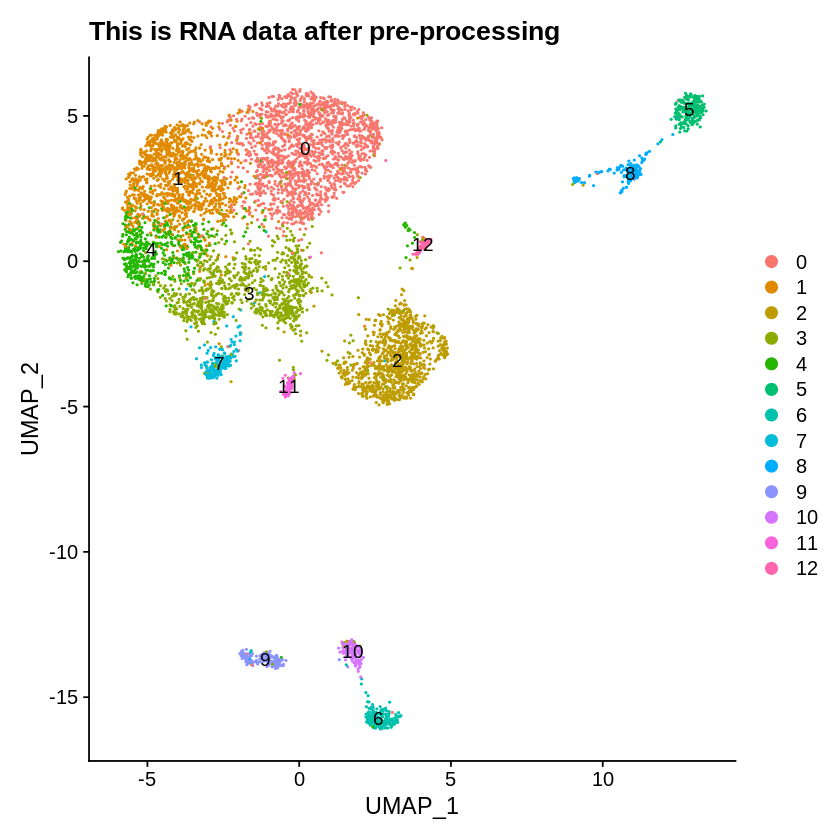

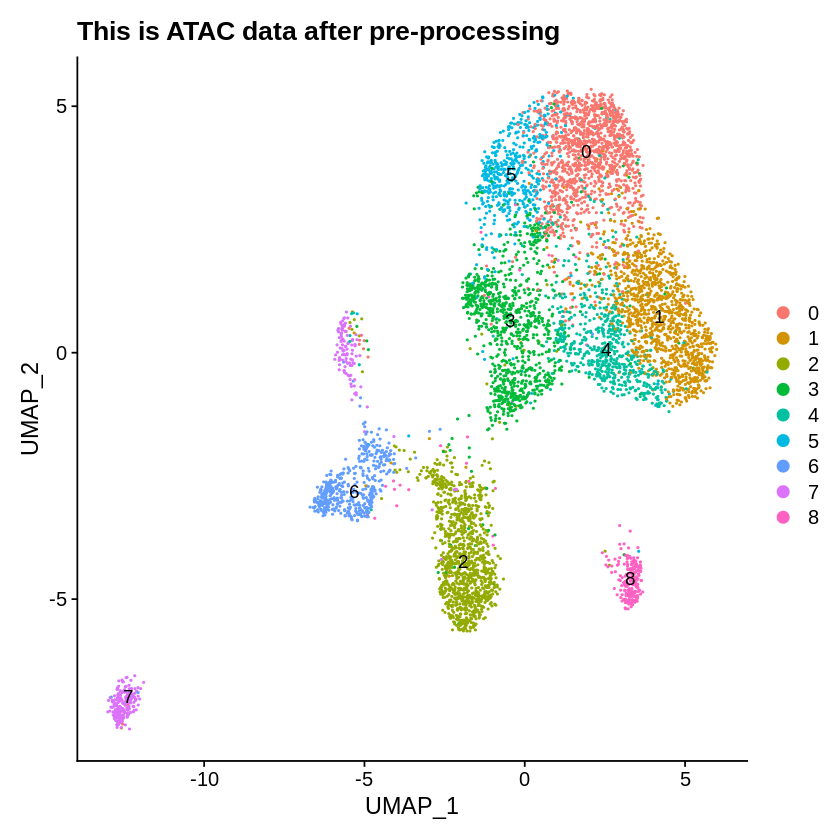

In [4]:
DimPlot(rna_preprocessed, reduction = "umap", label = TRUE) + ggtitle('This is RNA data after pre-processing')
DimPlot(atac_preprocessed, reduction = "umap", label = TRUE) + ggtitle('This is ATAC data after pre-processing')

Lets replace **low dimensional space LDS** from where clustering it's computed by seurat for **our LIBRA's integrated space**, in this way we can easily **plot new clustering results over original projections within Seurat**.

In [5]:
#Add computed shared components from LIBRA to Seurat
rna_preprocessed_libras_base_clustering = rna_preprocessed
rna_preprocessed_libras_base_clustering@reductions$pca@cell.embeddings = libra_shared_space[match(rownames(rna_preprocessed_libras_base_clustering@reductions$pca@cell.embeddings),rownames(libra_shared_space)),]
rna_preprocessed_libras_base_clustering = FindNeighbors(object = rna_preprocessed_libras_base_clustering, reduction = "pca", dims = 1:10)
rna_preprocessed_libras_base_clustering = FindClusters(object = rna_preprocessed_libras_base_clustering, resolution = 0.8, n.start = 1000)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6735
Number of edges: 219912

Running Louvain algorithm...
Maximum modularity in 1000 random starts: 0.8279
Number of communities: 15
Elapsed time: 66 seconds


We can plot new **clustering results base on LIBRA components** on **original UMAP projections**


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
1183 1077 1044  832  718  456  335  210  198  184  134  123   99   77   65 

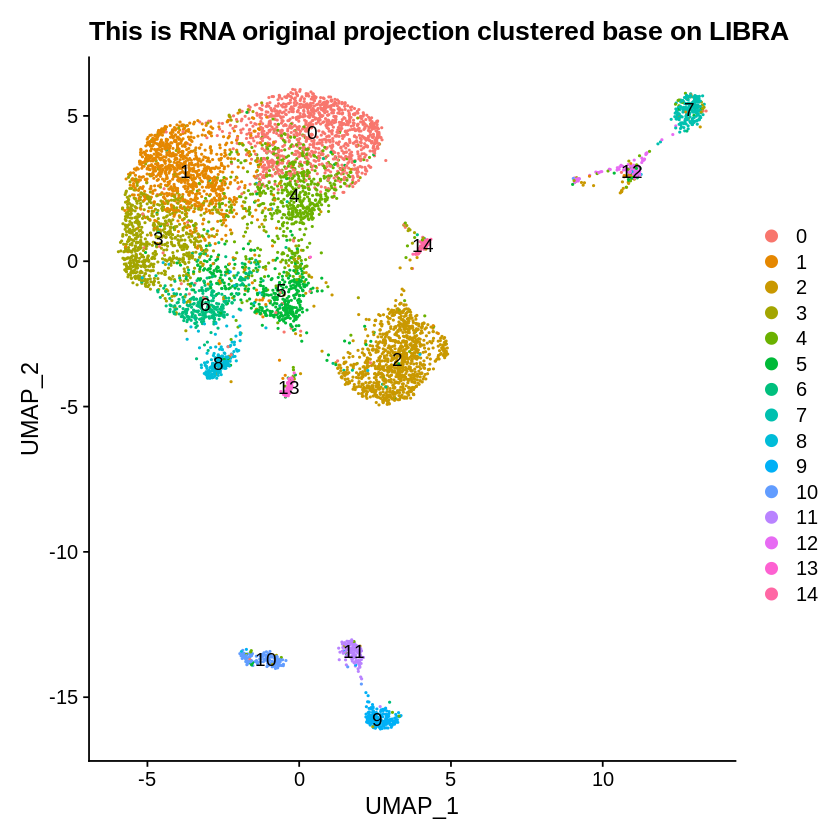

In [6]:
DimPlot(rna_preprocessed_libras_base_clustering, reduction = "umap", label = TRUE)  + ggtitle('This is RNA original projection clustered base on LIBRA')
table(rna_preprocessed_libras_base_clustering@active.ident)

Same that generated in RNA but for ATAC.  
Performed this way for ensure that base on same graph, **Louvain clustering it's enought stable** for having a exact clustering. We strongly recomend to **increase n.start** from default value to a **greater value**, else small fluctuations will happen in clustering.

In [7]:
#Add computed shared components from LIBRA to Seurat
atac_preprocessed_libras_base_clustering = atac_preprocessed
atac_preprocessed_libras_base_clustering@graphs$ATAC_snn = rna_preprocessed_libras_base_clustering@graphs$RNA_snn
atac_preprocessed_libras_base_clustering = FindClusters(object = atac_preprocessed_libras_base_clustering, resolution = 0.8, n.start = 1000)


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6735
Number of edges: 219912

Running Louvain algorithm...
Maximum modularity in 1000 random starts: 0.8279
Number of communities: 15
Elapsed time: 67 seconds



   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
1183 1077 1044  832  718  456  335  210  198  184  134  123   99   77   65 

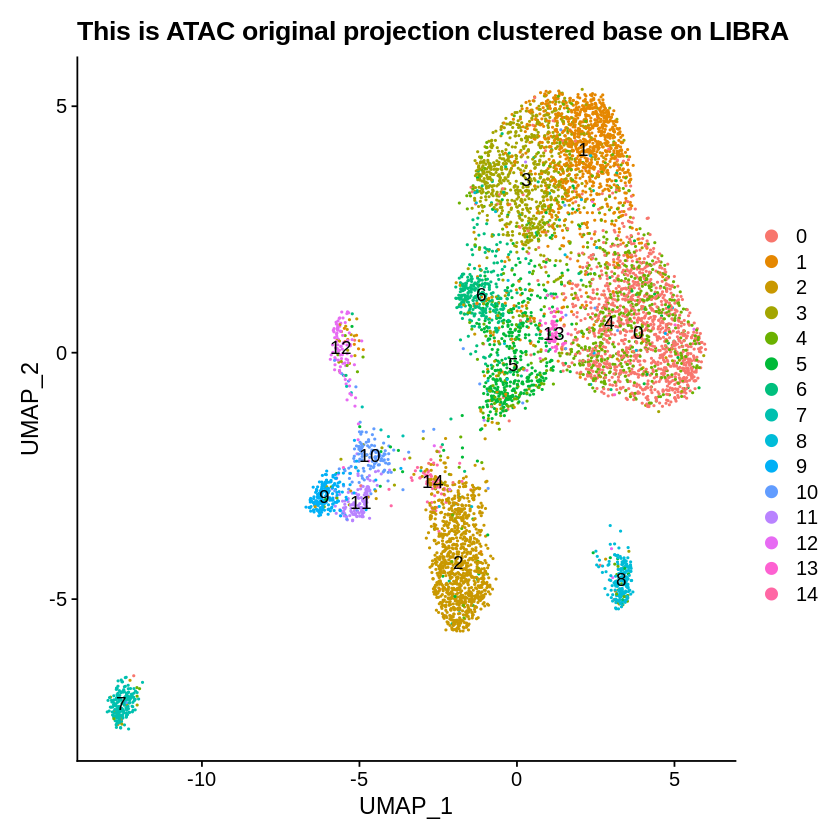

In [8]:
DimPlot(atac_preprocessed_libras_base_clustering, reduction = "umap", label = TRUE)  + ggtitle('This is ATAC original projection clustered base on LIBRA')
table(atac_preprocessed_libras_base_clustering@active.ident)

In [9]:
table(rna_preprocessed_libras_base_clustering@active.ident[colnames(rna_preprocessed_libras_base_clustering)] == atac_preprocessed_libras_base_clustering@active.ident[colnames(rna_preprocessed_libras_base_clustering)])



TRUE 
6735 

If not worried about small fluctuations on Louvain clustering you can simply traslate clustering vector from computed on RNA to ATAC:  

In [10]:
atac_preprocessed_libras_base_clustering@active.ident[colnames(rna_preprocessed_libras_base_clustering)] = rna_preprocessed_libras_base_clustering@active.ident[colnames(rna_preprocessed_libras_base_clustering)]
table(rna_preprocessed_libras_base_clustering@active.ident[colnames(rna_preprocessed_libras_base_clustering)] == atac_preprocessed_libras_base_clustering@active.ident[colnames(rna_preprocessed_libras_base_clustering)])


TRUE 
6735 

**Compute UMAP** over already replace pca components with **LIBRA** ones. **LIBRA shared space will be generated**.

In [11]:
LIBRA = RunUMAP(rna_preprocessed_libras_base_clustering, reduction = "pca", dims = 1:10)

17:15:23 UMAP embedding parameters a = 0.9922 b = 1.112

17:15:23 Read 6735 rows and found 10 numeric columns

17:15:23 Using Annoy for neighbor search, n_neighbors = 30

17:15:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:15:24 Writing NN index file to temp file /tmp/RtmprfkvUA/file74c15e9f8f84

17:15:24 Searching Annoy index using 1 thread, search_k = 3000

17:15:26 Annoy recall = 100%

17:15:26 Commencing smooth kNN distance calibration using 1 thread

17:15:27 Initializing from normalized Laplacian + noise

17:15:27 Commencing optimization for 500 epochs, with 274874 positive edges

17:15:45 Optimization finished



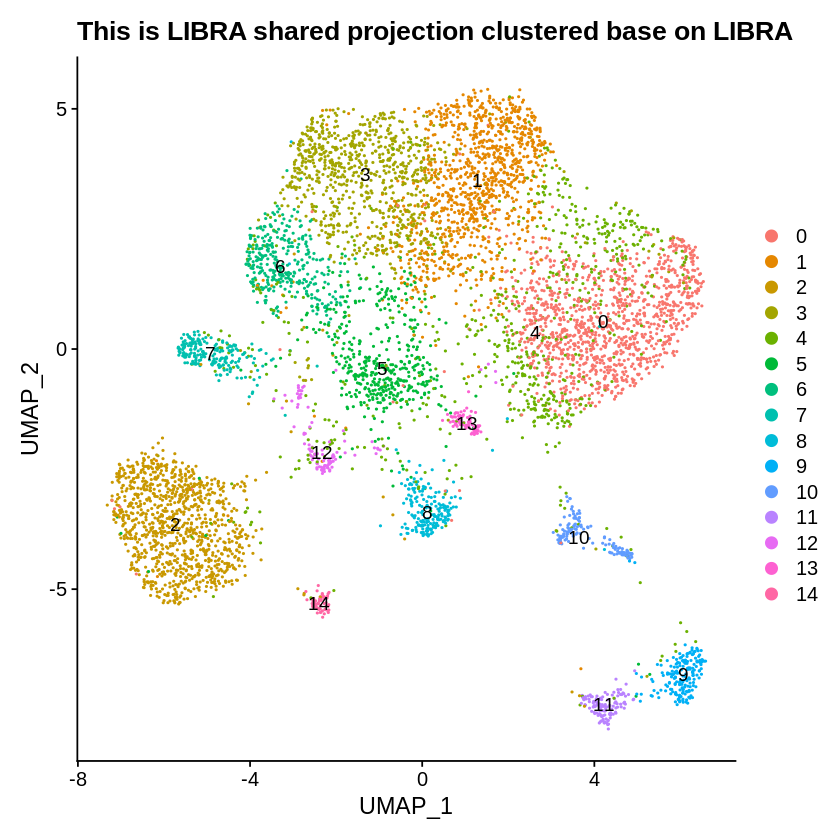

In [12]:
DimPlot(LIBRA, reduction = "umap", label = TRUE) + ggtitle('This is LIBRA shared projection clustered base on LIBRA')

Compute **cell correlation** between original **pre-processed RNA** dataset (x_train2) and **LIBRAS predicted RNA** dataset (libra_prediction)

In [13]:
for (n in 0:max(as.numeric(LIBRA@meta.data$RNA_snn_res.0.8)-1)) {
  cells_0=rownames(LIBRA@meta.data)[LIBRA@meta.data$RNA_snn_res.0.8 == n]
  print(mean(diag(cor(t(libra_prediction)[,cells_0], t(x_train2)[,cells_0]))))
}

[1] 0.7468939
[1] 0.718826
[1] 0.7134514
[1] 0.7482941
[1] 0.6539973
[1] 0.7319483
[1] 0.7342969
[1] 0.6523848
[1] 0.7280976
[1] 0.7094455
[1] 0.7020032
[1] 0.7058207
[1] 0.6486748
[1] 0.6852514
[1] 0.7281267


**PPJI** metric: **Clustering preservation** computation **between** LIBRA **integrated subspace** clustering and **original omics** RNA/ATAC clustering.

In [14]:
save.image("LIBRA_output.RData")